In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from math import sqrt

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import lightgbm as lgb
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import RobustScaler

In [2]:
train = pd.read_csv('train.csv')

In [14]:
test = pd.read_csv('test.csv')

In [4]:
train['address'] = train.city + ' ' + train.dong + ' ' + train.jibun

In [16]:
test['address'] = test.city + ' ' + test.dong + ' ' + test.jibun

In [10]:
train_unique = pd.DataFrame(train.address.unique())

In [17]:
test_unique = pd.DataFrame(test.address.unique())

In [12]:
train_unique.to_excel('train_unique.xlsx',index=False)

In [18]:
test_unique.to_excel('test_unique.xlsx',index=False)

In [19]:
# 가장 가까운 시설까지의 거리 및 주변 1km내 시설 수 count하는 함수 
def min_dist(a,b):
    dist = []
    dist_range = []
    dist_num = []
    for k in range(len(a)):
        dist_range=[]
        location = (a.위도[k],a.경도[k])
        dis = [geopy.distance.geodesic((i,j),location).km for i,j in list(zip(b.위도,b.경도))]
        min_dist = min(dis)
        dist.append(min_dist)
        for z in range(len(dis)):
            if dis[z] <= 1:
                dist_range.append(dis[z])
        num = len(dist_range)
        dist_num.append(num)
    return dist,dist_num

In [41]:
sub_b = pd.read_csv('busan_sub.csv',encoding='cp949')

In [48]:
sub_s = pd.read_excel('seoul_sub.xlsx')

In [55]:
sub_b.columns=['역번호','역사명','노선명','위도','경도']

In [56]:
sub = pd.concat([sub_s,sub_b])

In [59]:
sub.to_csv('sub_lon_lat.csv',index=False) ### 서울, 부산 지하철의 위,경도 데이터

In [23]:
dist = pd.read_csv('traindata/dist_num.csv')

In [25]:
dist.drop('Unnamed: 0',axis=1,inplace=True)

In [27]:
dist.head(3)

,high_dist,high_num,middle_dist,middle_num,elementary_dist,elementary_num,sub_b_dist,sub_b_num,sub_s_dist,sub_s_num,park_dist,park_num
0,0.527809,3,0.466106,2,0.694653,1,308.267115,0,0.970273,0,0.374601,4
1,0.312321,2,0.412396,2,0.244816,3,307.533365,0,0.333051,1,0.098140,17
2,0.248889,2,0.289687,2,0.268977,2,307.690284,0,0.398597,1,0.253866,14


In [29]:
dist_test = pd.read_csv('testdata/dist.csv')

In [31]:
dist_test.columns=['sub_dist','sub_num','high_dist','high_num','elem_dist','elem_num','middle_dist','middle_num','park_dist','park_num']

In [62]:
train_dist = pd.concat([train_unique,dist],axis=1)

In [89]:
data['popular'] = 0

In [90]:
data.loc[(data.apt == '현대') | (data.apt == '한신') | (data.apt == '삼성') | (data.apt == '대우') | (data.apt == '신동아') | (data.apt == '두산') | (data.apt == '주공2') | \
               (data.apt == '삼성래미안') | (data.apt == '우성') | (data.apt == '벽산'), ['popular']] = 1

In [11]:
# 거래 년도/월/일 변수 생성
year = [str(i)[:4] for i in train['transaction_year_month'].tolist()]
month = [str(i)[4:] for i in train['transaction_year_month'].tolist()]
day = train["transaction_date"].str.split("~").str.get(0).tolist()

In [12]:
train['year'] = year
train['month'] = month
train['day'] = day

In [13]:
# 거래일자(데이터타입: DateTime), 아파트 연식 변수 추가
train['DateTime'] = pd.to_datetime(train['year'] + '-' + train['month'] + '-' + train['day'])
train['years'] = train['year'].astype('int') - train['year_of_completion']

In [14]:
# floor 음수값 제거
train = train.loc[train['floor'] > 0].reset_index(drop = True)

In [15]:
for i in range(train.shape[0] - train_final.shape[0]):
    train_floor = train['floor'].tolist()
    final_floor = train_final['floor'].tolist()

    for index, num in enumerate(train_floor):
        if num != final_floor[index]:
            # print(num) # 확인용
            delete_index = index
            break

    # 삭제 코드
    train = train.drop([delete_index]).reset_index(drop = True)

In [26]:
def find_word(text, words_list):
    for i in words_list:
        if text.find(i) == -1:
            continue
        else:
            return True

In [27]:
apt_top10 = ['힐스테이트','자이','롯데캐슬','더샵','푸르지오',
             '래미안','아이파크','IPARK','SK뷰','VIEW','이편한세상','e편한세상','플레티넘','플래티넘',
             '호반베르디움','스타힐스','한라비발디']

apt_list = []

for apt in train['apt']:
    if find_word(apt,apt_top10) == True:
        apt_list.append(True)
    else:
        apt_list.append(False)

In [28]:
train['brand_apt'] = apt_list

In [16]:
# train 데이터의 정보 더 가지고 오기
train_more_info = train[['apt','dong','gu','DateTime','year_of_completion']]

In [17]:
train_more_info.shape

(1216374, 5)

In [18]:
train_final.shape

(1216374, 17)

In [19]:
train = pd.concat([train_more_info, train_final], axis = 1)

In [20]:
graph_df = train[['DateTime','transaction_real_price']]
graph_df['year'] = [i.year for i in train['DateTime']]

In [21]:
graph_df = graph_df.groupby(by = ['DateTime']).mean()

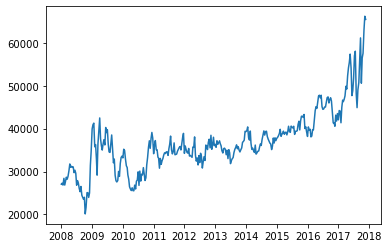

In [22]:
plt.plot(graph_df['transaction_real_price'])
plt.show()

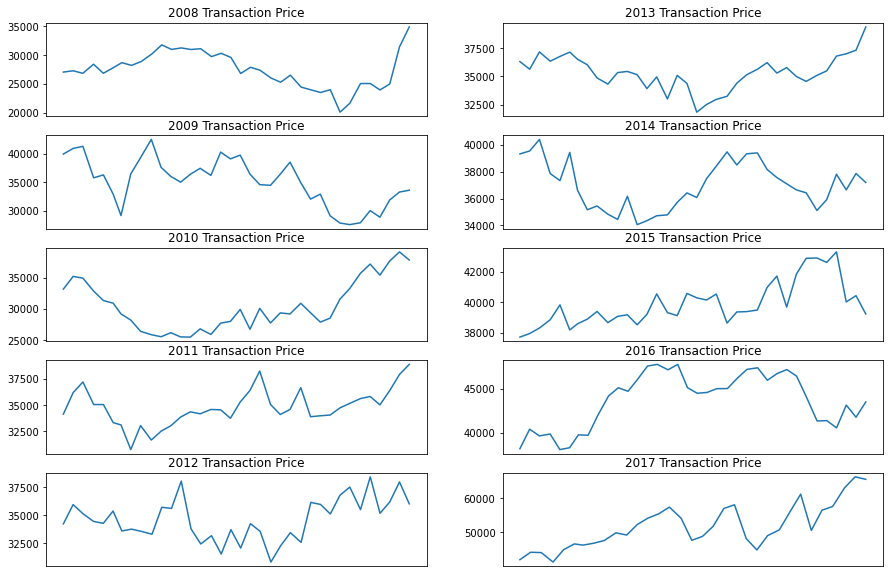

In [23]:
# 연별 시계열 그래프

plt.figure(figsize = (15,10))

plt.subplot(5,2,1)
plt.plot(graph_df.loc[graph_df['year'] == 2008, 'transaction_real_price'])
plt.title('2008 Transaction Price')
plt.xticks([])

plt.subplot(5,2,3)
plt.plot(graph_df.loc[graph_df['year'] == 2009, 'transaction_real_price'])
plt.title('2009 Transaction Price')
plt.xticks([]) 

plt.subplot(5,2,5)
plt.plot(graph_df.loc[graph_df['year'] == 2010, 'transaction_real_price'])
plt.title('2010 Transaction Price')
plt.xticks([]) 

plt.subplot(5,2,7)
plt.plot(graph_df.loc[graph_df['year'] == 2011, 'transaction_real_price'])
plt.title('2011 Transaction Price')
plt.xticks([]) 

plt.subplot(5,2,9)
plt.plot(graph_df.loc[graph_df['year'] == 2012, 'transaction_real_price'])
plt.title('2012 Transaction Price') 
plt.xticks([]) 

plt.subplot(5,2,2)
plt.plot(graph_df.loc[graph_df['year'] == 2013, 'transaction_real_price'])
plt.title('2013 Transaction Price')
plt.xticks([]) 

plt.subplot(5,2,4)
plt.plot(graph_df.loc[graph_df['year'] == 2014, 'transaction_real_price'])
plt.title('2014 Transaction Price')
plt.xticks([]) 

plt.subplot(5,2,6)
plt.plot(graph_df.loc[graph_df['year'] == 2015, 'transaction_real_price'])
plt.title('2015 Transaction Price')
plt.xticks([]) 

plt.subplot(5,2,8)
plt.plot(graph_df.loc[graph_df['year'] == 2016, 'transaction_real_price'])
plt.title('2016 Transaction Price')
plt.xticks([]) 

plt.subplot(5,2,10)
plt.plot(graph_df.loc[graph_df['year'] == 2017, 'transaction_real_price'])
plt.title('2017 Transaction Price')
plt.xticks([]) 

plt.show()

array([0, 1], dtype=int64)

In [93]:
data = pd.get_dummies(data,columns=['city'])

In [110]:
data.transaction_year_month=data.transaction_year_month.astype('int64')

In [109]:
data.transaction_year_month = data.transaction_year_month.apply(lambda x:x[:4])

In [111]:
data['years'] = data.transaction_year_month - data.year_of_completion

In [114]:
data.drop(['transaction_id','apartment_id','dong','jibun','apt','addr_kr','address','위도','경도'],axis=1,inplace=True)

In [65]:
train = pd.read_csv('train_final.csv')

In [67]:
test = pd.read_csv('testdata/test_final.csv')

In [5]:
X = train.drop(['transaction_real_price'],axis=1)
y = train['transaction_real_price']

In [6]:
scale_data = X.drop(['popular','city_부산광역시','city_서울특별시'],axis=1)

In [7]:
rob = RobustScaler()

In [8]:
rob.fit(scale_data)

RobustScaler()

In [9]:
scaled_rob = rob.transform(scale_data)

In [10]:
scaled_X = pd.DataFrame(scaled_rob,columns=scale_data.columns)

In [11]:
add_X = X[['popular','city_부산광역시','city_서울특별시']]

In [12]:
X = pd.concat([scaled_X,add_X],axis=1)

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state=123)

In [14]:
lgbm = lgb.LGBMRegressor()
dt = DecisionTreeRegressor()
xgb = XGBRegressor()

In [16]:
lgbm.fit(X_train,y_train)

LGBMRegressor()

In [15]:
dt.fit(X_train,y_train)

DecisionTreeRegressor()

In [16]:
xgb.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=12, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [17]:
def score(x):
    r2 = r2_score((y_test),x.predict(X_test))
    train_r2 = r2_score(y_train,x.predict(X_train))
    mse = mean_squared_error(y_test,x.predict(X_test))
    train_mse = mean_squared_error(y_train,x.predict(X_train))
    mae = mean_absolute_error(y_test,x.predict(X_test))
    train_mae = mean_absolute_error(y_train,x.predict(X_train))
    rmse = sqrt(mse)
    train_rmse = sqrt(train_mse)
    print('r2 = {}'.format(r2))
    print('train_r2 = {}'.format(train_r2))
    print('mse = {}'.format(mse))
    print('train_mse = {}'.format(train_mse))
    print('mae = {}'.format(mae))
    print('train_mae = {}'.format(train_mae))
    print('rmse = {}'.format(rmse))
    print('train_rmse = {}'.format(train_rmse))

In [36]:
score(lgbm)

r2 = 0.869066837608059
train_r2 = 0.8709293011102226
mse = 126644574.0380867
train_mse = 124015290.44561008
mae = 7427.660013144863
train_mae = 7397.948427828306
rmse = 11253.647143841266
train_rmse = 11136.215265771854


(0.869066837608059, 126644574.0380867, 7427.660013144863, 11253.647143841266)

In [18]:
score(dt)

r2 = 0.9660867433673405
train_r2 = 0.9973535561552259
mse = 32802460.90467789
train_mse = 2542788.602531155
mae = 2666.136237077679
train_mae = 572.1372318705346
rmse = 5727.343267578598
train_rmse = 1594.6123674834444


In [19]:
score(xgb)

r2 = 0.9171065749225638
train_r2 = 0.9204241461230375
mse = 80178331.58313859
train_mse = 76459046.98661666
mae = 5891.290134495779
train_mae = 5827.712018540566
rmse = 8954.235399135907
train_rmse = 8744.086400912141


In [176]:
n_features = X.shape[1]

In [177]:
df = pd.DataFrame({'col': X.columns, 'score': rfr.feature_importances_})
df = df.sort_values(by = 'score')

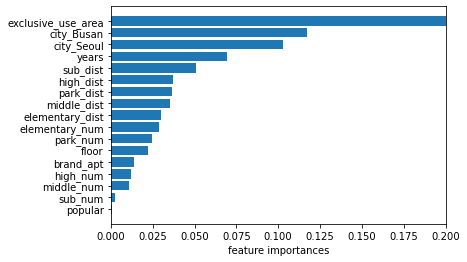

In [178]:
import matplotlib.pyplot as plt

plt.barh(range(n_features), df['score'], align='center')
plt.yticks(np.arange(n_features), df['col'])
plt.xlabel("feature importances")
plt.xlim(0, 0.2)
plt.show()

In [53]:
import eli5
from eli5.sklearn import PermutationImportance

In [54]:
perm = PermutationImportance(rfr, random_state = 100)
perm.fit(X_test,y_test)

PermutationImportance(estimator=RandomForestRegressor(), random_state=100)

In [55]:
eli5.show_weights(perm, feature_names = X_test.columns.tolist())

Weight,Feature
0.8743 ± 0.0074,city_Seoul
0.3020 ± 0.0019,years
0.2647 ± 0.0013,elementary_num
0.2616 ± 0.0016,sub_dist
0.2329 ± 0.0018,park_dist
0.1778 ± 0.0007,high_dist
0.1686 ± 0.0014,brand_apt
0.1466 ± 0.0013,middle_dist
0.1251 ± 0.0006,elementary_dist
0.1220 ± 0.0006,park_num


In [25]:
pred = xgb.predict(test_data)

In [28]:
test['transaction_real_price'] = pred

In [30]:
result_xgb = test[['transaction_id','transaction_real_price']]

In [31]:
result_xgb.head(3)

,transaction_id,transaction_real_price
0,1145756,30296.783203
1,1198704,10164.674805
2,1222384,9035.934570


In [32]:
result_xgb.to_csv('result_xgb.csv',index=False) ## 결과파일